In [1]:
#imports
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

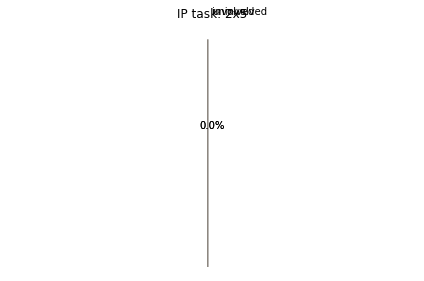

In [7]:
dir = "C:/Users/benso/Desktop/Projects/Neural Reuse/Neural_Reuse_New/Combined/IP_Reuse/Data_2x5"

files = glob.glob(os.path.join(dir, "perf_*.npy"))
files.sort()

#count[0] = no task, count[1] = task
l0 = 0
l1 = 0
for i, file in enumerate(files):
    
    ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
    reuse = np.load(dir + "/stats_" + str(ind) + ".npy")
    uninvolved = reuse[0]
    involved = reuse[1]
    l0 += uninvolved
    l1 += involved
data = [l0,l1]
    

labels = 'uninvolved','involved'

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("IP task: 2x5")
plt.tight_layout()
plt.show()